In [461]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [462]:
''' optimization via gradient descent '''

# EXAMPLE 1
def f(x):
    x1, x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f(x):
    x1, x2 = x
    return np.array([2*(x1 - 3), 2*(x2 - 1)])

x_true = np.array([3,1])

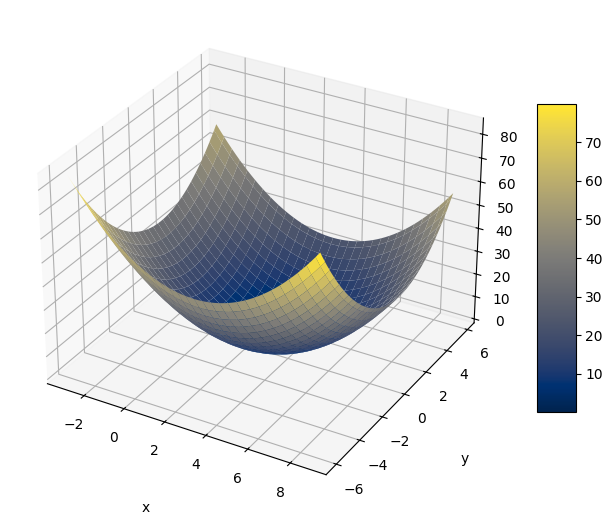

In [463]:
# plot the function

# prepare the mesh
x = np.arange(-3,9,0.2)
y = np.arange(-6,6,0.2)
X, Y = np.meshgrid(x, y)

# compute the value of f on the mesh
Z = np.zeros((60,60))
for i in range(60):
    for j in range(60):
        Z[i,j] = f(np.array([X[i,j],Y[i,j]]))

# prepare the 3D space 
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

# plot
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [464]:
def GD(f,grad_f,x0,kmax,tolf,tolx,alpha = 1e-6):
    
    x_val = [x0]
    f_val = [f(x0)]
    grad_x0 = grad_f(x0)
    norm_grad_x0 = np.linalg.norm(grad_x0,2)
    grads_val = [grad_x0]
    norm_grads = [norm_grad_x0]
    
    # start iteration
    for k in range(kmax):
        
        # compute the new point  
        x_old = x_val[k]
        x_new = x_old - alpha * grad_f(x_old)
        x_val.append(x_new)
        
        # compute the value of f(x_new)
        f_val.append(f(x_new))
        
        # compute the gradient of f in x_new
        grad_x_new = grad_f(x_new)
        grads_val.append(grad_x_new)
        
        # compute the error
        norm_grad_x_new = np.linalg.norm(grad_x_new,2)
        norm_grads.append(norm_grad_x_new)
        
        # first condition 
        if norm_grad_x_new < tolf * norm_grad_x0:
            break
        
        # second condition
        if np.linalg.norm(x_new - x_old,2) < tolx:
            break
        
    return x_val, k, f_val, grads_val, norm_grads

alplha = 0.1: GD on the function f converges after 61 iterations to the point [2.99999632 0.99999877]
alplha = 0.01: GD on the function f converges after 549 iterations to the point [2.99995427 0.99998476]
alplha = 0.001: GD on the function f converges after 1000 iterations to the point [2.59480643 0.86493548]
alplha = 0.0001: GD on the function f converges after 1000 iterations to the point [0.54385687 0.18128562]


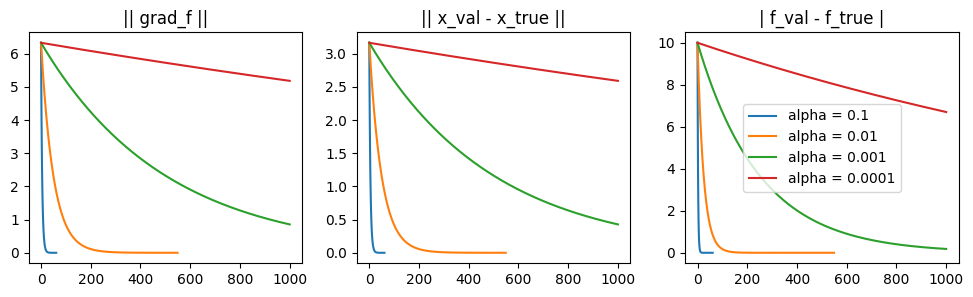

In [465]:
# set the tollerances 
tolf = 1e-6
tolx = 1e-6

# chose the max number of iterations
kmax = 1000

# chose the initial iteration 
x0 = np.zeros((2,))

# set step-size range
alphas = (1e-1, 1e-2, 1e-3, 1e-4)
plt.figure(figsize=(12,3))

for alpha in alphas:

    # test the algorithm
    x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha)

    # plot the results
    print(f"alplha = {alpha}: GD on the function f converges after {k+1} iterations to the point {x_val[-1]}")

    plt.subplot(1, 3, 1)
    plt.plot(norm_grads)
    plt.title("|| grad_f ||")

    plt.subplot(1, 3, 2)
    plt.plot(np.sum(np.abs(x_val - x_true)**2,axis=1)**(1./2))
    plt.title("|| x_val - x_true ||")
    
    plt.subplot(1, 3, 3)
    plt.plot(np.abs(f_val - f(x_true)))
    plt.title('| f_val - f_true |')

plt.legend([f"alpha = {alpha}" for alpha in alphas])
plt.show()

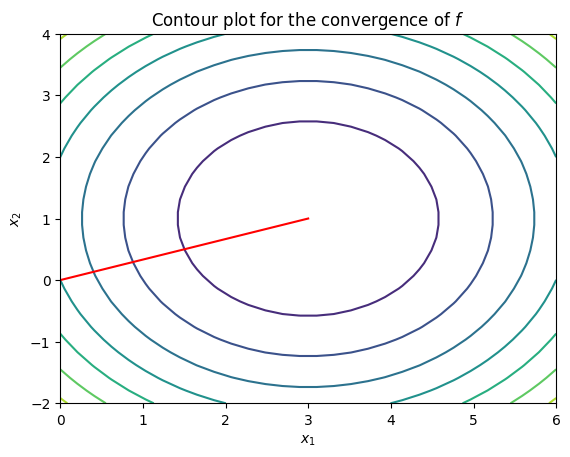

In [466]:
# contour plot for the best alpha 
x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha = 1e-2)

xv = np.linspace(0,6, 30)
yv = np.linspace(-2,4, 30)
xx, yy = np.meshgrid(xv, yv)
f_ = lambda x, y:f(np.array([x,y]))
zz = f_(xx, yy)
plt.figure()
plt.title("Contour plot for the convergence of $f$")
plt.contour(xx, yy, zz)
plt.plot([X[0] for X in x_val], [X[1] for X in x_val], color= "red")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [467]:
# EXAMPLE 2

def f(x):
    x1, x2 = x
    return 10*(x1 - 1)**2 + (x2 - 2)**2

def grad_f(x):
    x1, x2 = x
    return np.array([20*(x1 - 1), 2*(x2 - 2)])

x_true = np.array([1,2])

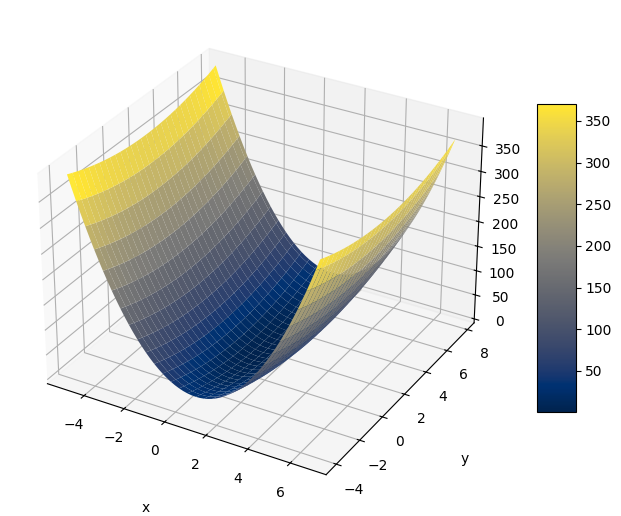

In [468]:
# plot the function
# prepare the mesh
x = np.arange(-5,7,0.2)
y = np.arange(-4,8,0.2)
X, Y = np.meshgrid(x, y)

# compute the value of f on the mesh
Z = np.zeros((60,60))
for i in range(60):
    for j in range(60):
        Z[i,j] = f(np.array([X[i,j],Y[i,j]]))

# prepare the 3D space 
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')

# plot
surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

alplha = 0.1: GD on the function f converges after 1000 iterations to the point [0. 2.]
alplha = 0.01: GD on the function f converges after 526 iterations to the point [1.         1.99995148]
alplha = 0.001: GD on the function f converges after 1000 iterations to the point [1.         1.72987096]
alplha = 0.0001: GD on the function f converges after 1000 iterations to the point [0.86493548 0.36257125]


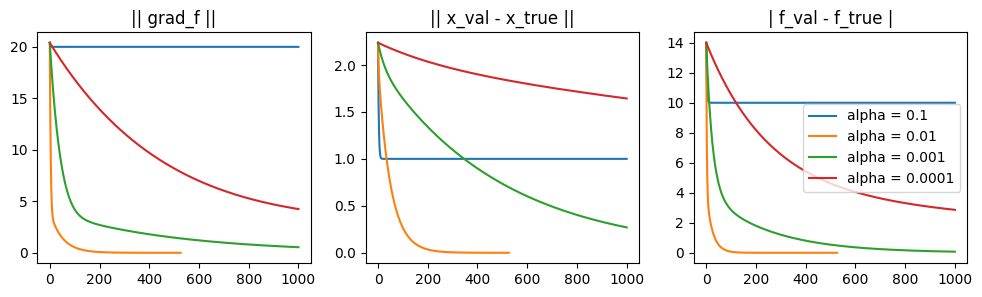

In [469]:
# set the tollerances 
tolf = 1e-6
tolx = 1e-6

# chose the max number of iterations
kmax = 1000

# chose the initial iteration 
x0 = np.zeros((2,))

# set step-size range
alphas = (1e-1, 1e-2, 1e-3, 1e-4)
plt.figure(figsize=(12,3))

for alpha in alphas:

    # test the algorithm
    x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha)

    # plot the results
    print(f"alplha = {alpha}: GD on the function f converges after {k+1} iterations to the point {x_val[-1]}")

    plt.subplot(1, 3, 1)
    plt.plot(norm_grads)
    plt.title("|| grad_f ||")

    plt.subplot(1, 3, 2)
    plt.plot(np.sum(np.abs(x_val - x_true)**2,axis=1)**(1./2))
    plt.title("|| x_val - x_true ||")
    
    plt.subplot(1, 3, 3)
    plt.plot(np.abs(f_val - f(x_true)))
    plt.title("| f_val - f_true |")
    
plt.legend([f"alpha = {alpha}" for alpha in alphas])
plt.show()

Text(0, 0.5, '$x_2$')

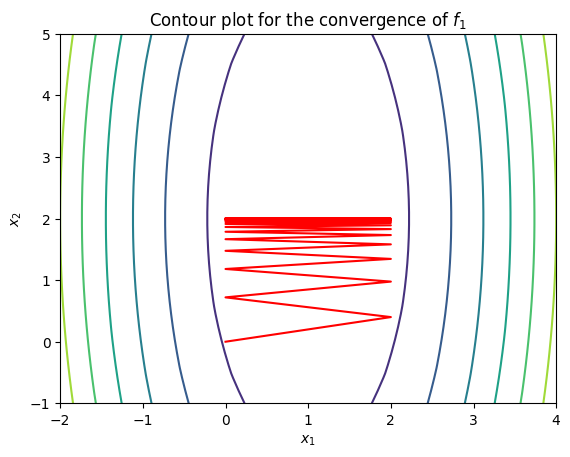

In [438]:
# with alpha = 1e-1 we can't reach the solution, as we can see from the contour plot 

# contour plot for the best alpha 
x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha = 1e-1)

xv = np.linspace(-2,4, 30)
yv = np.linspace(-1,5, 30)
xx, yy = np.meshgrid(xv, yv)
f_ = lambda x, y:f(np.array([x,y]))
zz = f_(xx, yy)
plt.figure()
plt.title("Contour plot for the convergence of $f_1$")
plt.contour(xx, yy, zz)
plt.plot([X[0] for X in x_val], [X[1] for X in x_val], color= "red")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [470]:
# EXAMPLE 3

def f(x, A, b):  
    return 0.5 * np.linalg.norm(A @ x - b,2)**2

def grad_f(x, A, b):
    return A.T @ (A @ x - b)

In [472]:
'''
implement the GD method on f:R^n --> R with backtracking
'''

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x, A, b), A, b) > f(x, A, b) - c * alpha * np.linalg.norm(grad_f(x, A, b), 2) ** 2: # descending condition 
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

def btGD(f,grad_f,x0,kmax,tolf,tolx):
    
    x_val = [x0]
    f_val = [f(x0, A, b)]
    grad_x0 = grad_f(x0, A, b)
    norm_grad_x0 = np.linalg.norm(grad_x0,2)
    grads_val = [grad_x0]
    norm_grads = [norm_grad_x0]
    
    # start iteration
    for k in range(kmax):
        
        # compute the optimal stepsize with backtracking 
        x_old = x_val[k]
        alpha = backtracking(f, grad_f, x_old)
        
        # compute the new point  
        x_new = x_old - alpha * grad_f(x_old, A, b)
        x_val.append(x_new)
        
        # compute the value of f(x_new)
        f_val.append(f(x_new, A, b))
        
        # compute the gradient of f in x_new
        grad_x_new = grad_f(x_new, A, b)
        grads_val.append(grad_x_new)
        
        # compute the error
        norm_grad_x_new = np.linalg.norm(grad_x_new,2)
        norm_grads.append(norm_grad_x_new)
        
        # first condition 
        if norm_grad_x_new < tolf * norm_grad_x0:
            break
        
        # second condition
        if np.linalg.norm(x_new - x_old,2) < tolx:
            break
        
    return x_val, k, f_val, grads_val, norm_grads

n = 5: btGD on the function f converges after 351 iterations to the point [0.99505898 1.00214716 1.00595291 0.99655441 1.0001911 ]
n = 10: btGD on the function f converges after 666 iterations to the point [0.99642501 0.99880794 1.00082655 1.00221155 1.00261983 1.0017013
 0.99939445 0.99699447 1.00086583 1.0000309 ]
n = 15: btGD on the function f converges after 878 iterations to the point [0.99465095 0.99673365 0.9987007  1.00047877 1.0019749  1.00307407
 1.00363945 1.00351999 1.00257588 1.00074662 0.99821973 0.99583509
 0.99599611 1.00402857 0.99958083]
n = 20: btGD on the function f converges after 1000 iterations to the point [0.99474601 0.99621825 0.99763514 0.99897151 1.00019749 1.00127803
 1.00217268 1.00283582 1.00321772 1.00326735 1.00293815 1.00219916
 1.00105571 0.99958641 0.99800725 0.99677433 0.99671144 0.99896287
 1.00341002 0.99949269]
n = 25: btGD on the function f converges after 623 iterations to the point [0.99550373 0.99655678 0.99757269 0.99853991 0.99944531 1.0002

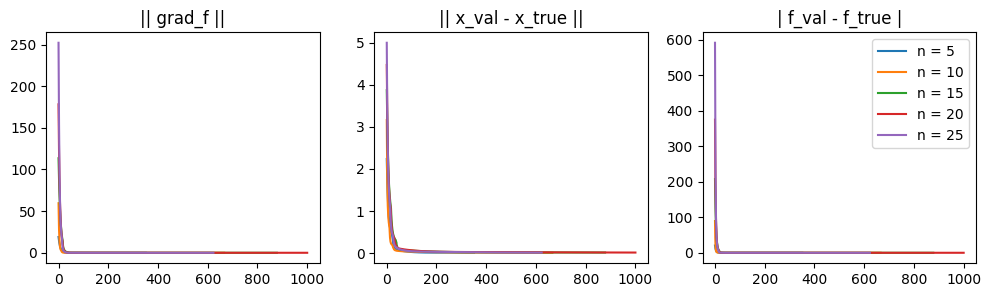

In [473]:
# set the tollerances 
tolf = 1e-6
tolx = 1e-6

# chose the max number of iterations
kmax = 1000

plt.figure(figsize=(12,3))

for n in range(5, 26, 5):
    
    # create the vandermonde matrix and the other parameters 
    A = np.vander(np.linspace(0,1,n),n)
    x_true = np.ones((n,))
    b = A @ x_true 
    
    # chose the initial iteration 
    x0 = np.zeros((n,))

    # test the algorithm
    x_val, k, f_val, grads_val, norm_grads = btGD(f,grad_f,x0,kmax,tolf,tolx)

    # plot the results
    print(f"n = {n}: btGD on the function f converges after {k+1} iterations to the point {x_val[-1]}")

    plt.subplot(1, 3, 1)
    plt.plot(norm_grads)
    plt.title("|| grad_f ||")

    plt.subplot(1, 3, 2)
    plt.plot(np.sum(np.abs(x_val - x_true)**2,axis=1)**(1./2))
    plt.title("|| x_val - x_true ||")
    
    plt.subplot(1, 3, 3)
    plt.plot(np.abs(f_val - f(x_true, A, b)))
    plt.title("| f_val - f_true |")
    
plt.legend([f"n = {n}" for n in range(5, 26, 5)])
plt.show()

In [475]:
# EXAMPLE 4

def f(x, A, b, l):
    return 0.5 * np.linalg.norm(A @ x - b,2)**2 + l*0.5*np.linalg.norm(x,2)

def grad_f(x, A, b, l):
    return A.T @ (A @ x - b) + l*(A.T @ x)

In [481]:
'''
implement the GD method on f:R^n --> R with backtracking
'''

def backtracking(f, grad_f, x, A, b, l):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x, A, b, l), A, b, l) > f(x, A, b, l) - c * alpha * np.linalg.norm(grad_f(x, A, b, l), 2) ** 2: # descending condition 
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

def btGD(f,grad_f,x0,kmax,tolf,tolx,A,b,l):
    
    x_val = [x0]
    f_val = [f(x0, A, b, l)]
    grad_x0 = grad_f(x0, A, b, l)
    norm_grad_x0 = np.linalg.norm(grad_x0,2)
    grads_val = [grad_x0]
    norm_grads = [norm_grad_x0]
    
    # start iteration
    for k in range(kmax):
        
        # compute the optimal stepsize with backtracking 
        x_old = x_val[k]
        alpha = backtracking(f, grad_f, x_old,A,b,l)
        
        # compute the new point  
        x_new = x_old - alpha * grad_f(x_old, A, b, l)
        x_val.append(x_new)
        
        # compute the value of f(x_new)
        f_val.append(f(x_new, A, b, l))
        
        # compute the gradient of f in x_new
        grad_x_new = grad_f(x_new, A, b, l)
        grads_val.append(grad_x_new)
        
        # compute the error
        norm_grad_x_new = np.linalg.norm(grad_x_new,2)
        norm_grads.append(norm_grad_x_new)
        
        # first condition 
        if norm_grad_x_new < tolf * norm_grad_x0:
            break
        
        # second condition
        if np.linalg.norm(x_new - x_old,2) < tolx:
            break
        
    return x_val, k, f_val, grads_val, norm_grads

the dimension is n = 5
lambda = 0.1: btGD on the function f converges after 1000 iterations to the point [0.91952089 0.95135098 0.99238512 1.03901831 0.93918077]
lambda = 0.2: btGD on the function f converges after 1000 iterations to the point [0.92239053 0.95132663 0.98689864 1.02148963 0.86121413]
lambda = 0.5: btGD on the function f converges after 1000 iterations to the point [0.94963925 0.96863494 0.98574707 0.98039876 0.62837122]
lambda = 0.8: btGD on the function f converges after 1000 iterations to the point [1.01818991 1.02403619 1.01701111 0.96018379 0.37049809]
lambda = 1: btGD on the function f converges after 1000 iterations to the point [1.06163084 1.05948663 1.03781424 0.94978842 0.21600465]


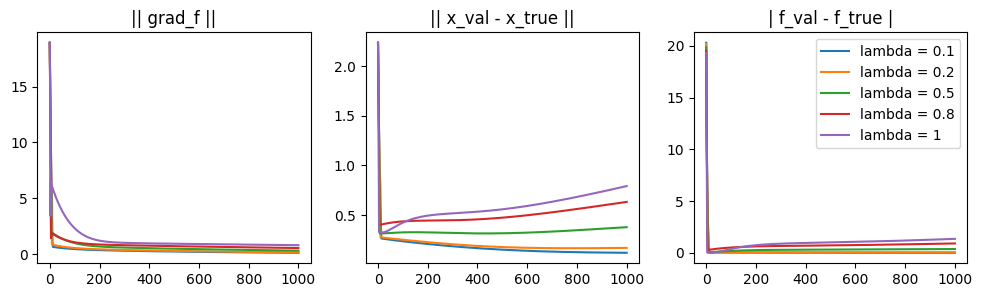

the dimension is n = 10
lambda = 0.1: btGD on the function f converges after 1000 iterations to the point [0.92839021 0.94360036 0.96079643 0.98008127 1.00134219 1.02390448
 1.04559775 1.0598758  1.04490066 0.86908859]
lambda = 0.2: btGD on the function f converges after 1000 iterations to the point [0.93844162 0.95306224 0.9694771  0.98769235 1.00742517 1.02767514
 1.04557248 1.05279989 1.02181523 0.77905332]
lambda = 0.5: btGD on the function f converges after 1000 iterations to the point [0.9874262  0.99963457 1.01290693 1.02690297 1.04074147 1.05229788
 1.05633372 1.03864175 0.95301675 0.49102888]
lambda = 0.8: btGD on the function f converges after 1000 iterations to the point [1.07090348 1.07966125 1.08848971 1.09659915 1.10234354 1.10218334
 1.08794378 1.03822294 0.88430924 0.15729103]
lambda = 1: btGD on the function f converges after 1000 iterations to the point [ 1.15023303  1.15610101  1.16121416  1.1644124   1.16342123  1.15354177
  1.12420074  1.04813654  0.83835598 -0.103

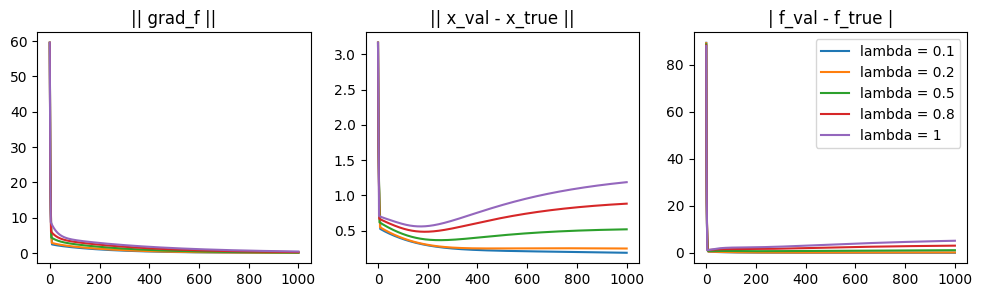

the dimension is n = 15
lambda = 0.1: btGD on the function f converges after 1000 iterations to the point [0.97316986 0.97976238 0.98663729 0.99372283 1.00089964 1.00797586
 1.01464772 1.0204361  1.02458218 1.02587177 1.02233654 1.01075994
 0.98604218 0.94215515 0.91884083]
lambda = 0.2: btGD on the function f converges after 1000 iterations to the point [0.97731722 0.9838463  0.9906572  0.99767845 1.00479054 1.01179999
 1.01839803 1.02409267 1.02809369 1.02911028 1.02497936 1.0119473
 0.98321207 0.92596332 0.82386323]
lambda = 0.5: btGD on the function f converges after 1000 iterations to the point [0.97792331 0.98603064 0.99466545 1.00379967 1.01336288 1.02321382
 1.03309118 1.04252543 1.05067322 1.05598631 1.05549352 1.0430537
 1.00432652 0.89799724 0.50320124]
lambda = 0.8: btGD on the function f converges after 1000 iterations to the point [1.0358387  1.04238344 1.04923879 1.05633079 1.06352757 1.07060285
 1.07717269 1.08258149 1.08568498 1.08440801 1.07475809 1.04833349
 0.984782

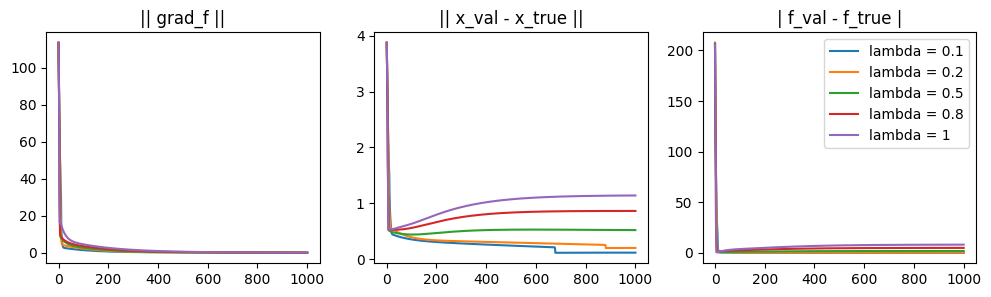

the dimension is n = 20
lambda = 0.1: btGD on the function f converges after 1000 iterations to the point [0.97212057 0.97696292 0.98196542 0.98710551 0.99234984 0.99765036
 1.00293916 1.00812115 1.01306387 1.01758318 1.02142266 1.02422404
 1.02548436 1.02449413 1.02025072 1.01134951 0.99590636 0.97183464
 0.93941664 0.92587683]
lambda = 0.2: btGD on the function f converges after 1000 iterations to the point [0.97341383 0.97829168 0.9833391  0.98853554 0.99384996 0.99923717
 1.00463254 1.00994483 1.01504585 1.01975583 1.02382196 1.02688683
 1.02844068 1.027748   1.02373151 1.01478345 0.99844324 0.97078104
 0.92468629 0.82963762]
lambda = 0.5: btGD on the function f converges after 1000 iterations to the point [0.99415951 0.99816214 1.00229442 1.00653741 1.01086311 1.01523124
 1.01958469 1.02384304 1.02789333 1.03157631 1.03466572 1.0368357
 1.03760721 1.0362543  1.03162517 1.02175602 1.00287935 0.96616362
 0.88254037 0.53354206]
lambda = 0.8: btGD on the function f converges after 100

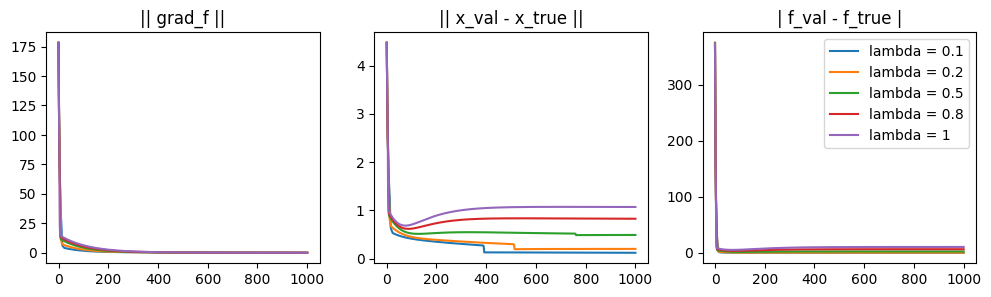

the dimension is n = 25
lambda = 0.1: btGD on the function f converges after 1000 iterations to the point [0.97300994 0.97641131 0.97989026 0.98343622 0.98703514 0.99066877
 0.99431355 0.99793935 1.00150786 1.00497058 1.00826628 1.01131791
 1.01402873 1.01627771 1.01791407 1.01875154 1.01856314 1.01707946
 1.01399699 1.00901226 1.00191708 0.99282388 0.98254921 0.97168338
 0.91183979]
lambda = 0.2: btGD on the function f converges after 1000 iterations to the point [0.97249357 0.97602493 0.97964657 0.98334928 0.9871206  0.99094397
 0.99479769 0.99865367 1.00247569 1.00621738 1.00981954 1.01320673
 1.016283   1.01892639 1.02098212 1.02225413 1.02249507 1.02139512
 1.01857138 1.01356073 1.00581714 0.99467278 0.97886105 0.95182995
 0.81845575]
lambda = 0.5: btGD on the function f converges after 1000 iterations to the point [0.98971854 0.99258627 0.99552056 0.99851295 1.00155222 1.00462369
 1.00770844 1.01078216 1.01381385 1.0167641  1.01958287 1.02220663
 1.02455471 1.02652436 1.0279842  

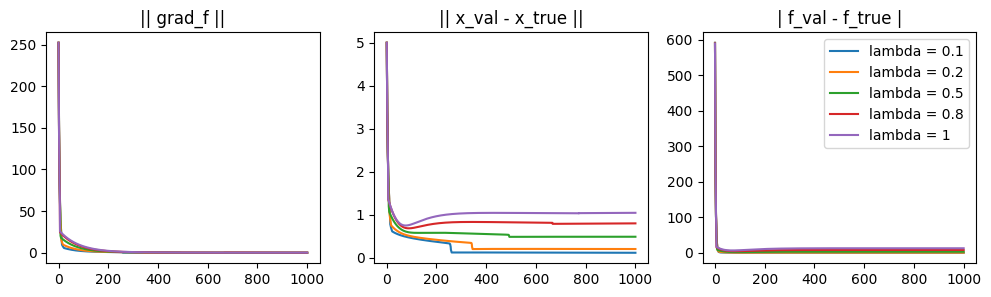

In [482]:
# set the tollerances 
tolf = 1e-6
tolx = 1e-6

# chose the max number of iterations
kmax = 1000

# set the lambda values 
ls = [0.1, 0.2, 0.5, 0.8, 1]

# loop over the dimension
for n in range(5, 26, 5):
    
    print(f"the dimension is n = {n}")
    plt.figure(figsize=(12,3))
    
    # create the vandermonde matrix and the other parameters 
    A = np.vander(np.linspace(0,1,n),n)
    x_true = np.ones((n,))
    b = A @ x_true
    
    # loop over the lambda  
    for l in ls:
    
        # chose the initial iteration 
        x0 = np.zeros((n,))

        # test the algorithm
        x_val, k, f_val, grads_val, norm_grads = btGD(f,grad_f,x0,kmax,tolf,tolx,A,b,l)

        # plot the results
        print(f"lambda = {l}: btGD on the function f converges after {k+1} iterations to the point {x_val[-1]}")

        plt.subplot(1, 3, 1)
        plt.plot(norm_grads)
        plt.title("|| grad_f ||")

        plt.subplot(1, 3, 2)
        plt.plot(np.sum(np.abs(x_val - x_true)**2,axis=1)**(1./2))
        plt.title("|| x_val - x_true ||")
    
        plt.subplot(1, 3, 3)
        plt.plot(np.abs(f_val - f(x_true, A, b, l)))
        plt.title("| f_val - f_true |")
    
    plt.legend([f"lambda = {l}" for l in ls])
    plt.show()

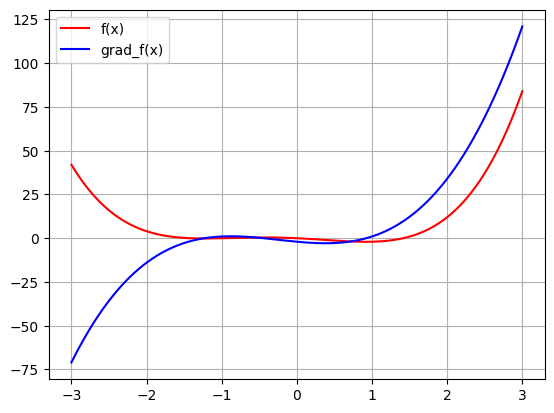

In [483]:
# EXAMPLE 5 

def f(x):
    return x**4 + x**3 - 2*(x**2) - 2*x

def grad_f(x):
    return 4*x**3 + 3*x**2 - 4*x - 2 

# plot the functions 
n = 200
x = np.linspace(-3,3,n)

plt.plot(x,f(x),'red')
plt.plot(x,grad_f(x),'blue')
plt.legend(["f(x)", "grad_f(x)"])
plt.grid()
plt.show()

In [484]:
'''
implement the GD method on f:R^n --> R without backtracking
'''
def GD(f,grad_f,x0,kmax,tolf,tolx,alpha = 1e-6):
    
    x_val = [x0]
    f_val = [f(x0)]
    grad_x0 = grad_f(x0)
    norm_grad_x0 = abs(grad_x0)
    grads_val = [grad_x0]
    norm_grads = [norm_grad_x0]
    
    # start iteration
    for k in range(kmax):
        
        # compute the new point  
        x_old = x_val[k]
        x_new = x_old - alpha * grad_f(x_old)
        x_val.append(x_new)
        
        # compute the value of f(x_new)
        f_val.append(f(x_new))
        
        # compute the gradient of f in x_new
        grad_x_new = grad_f(x_new)
        grads_val.append(grad_x_new)
        
        # compute the error
        norm_grads_x_new = abs(grad_x_new)
        norm_grads.append(norm_grads_x_new)
        
        # first condition 
        if norm_grads_x_new < tolf * norm_grad_x0:
            break
        
        # second condition
        if abs(x_new - x_old) < tolx:
            break
        
    return x_val, k, f_val, grads_val, norm_grads

the selected step size is alpha = 0.1
x0 = 0: GD on the function f converges after 11 iterations to the point 0.922224841451033
x0 = -2: GD on the function f converges after 17 iterations to the point -1.232238145066871
x0 = 2: GD on the function f converges after 10 iterations to the point -1.2322413053735493


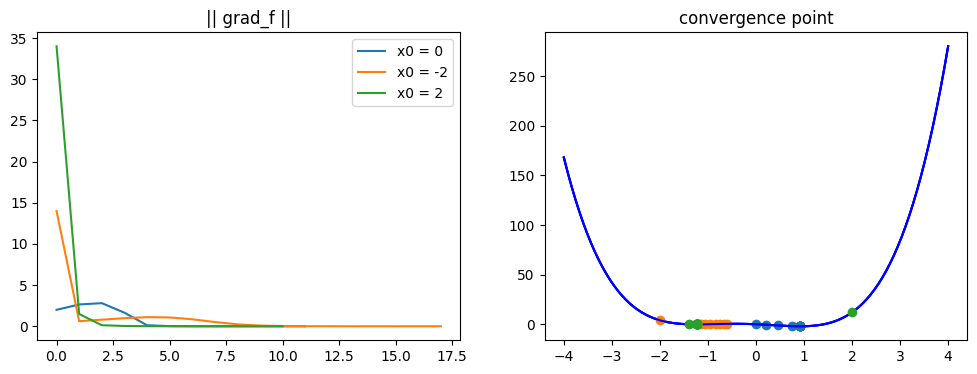

the selected step size is alpha = 0.01
x0 = 0: GD on the function f converges after 113 iterations to the point 0.9222175461936309
x0 = -2: GD on the function f converges after 142 iterations to the point -1.2322523463290935
x0 = 2: GD on the function f converges after 87 iterations to the point 0.9222322138714723


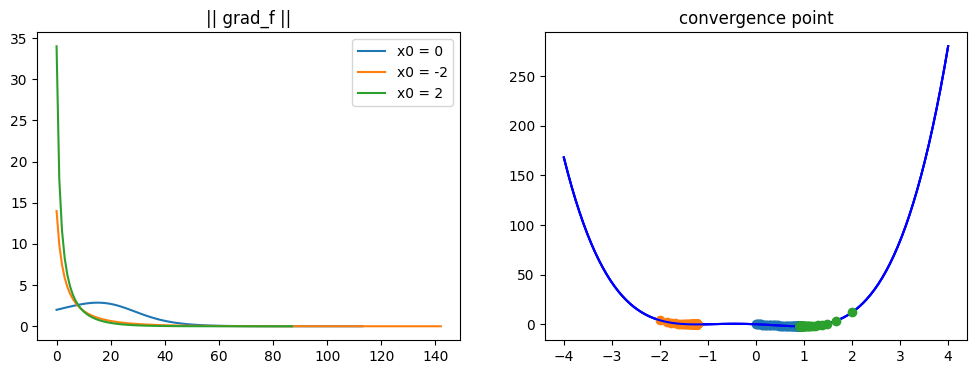

the selected step size is alpha = 0.001
x0 = 0: GD on the function f converges after 969 iterations to the point 0.9221411248012283
x0 = -2: GD on the function f converges after 1000 iterations to the point -1.2325699252588889
x0 = 2: GD on the function f converges after 725 iterations to the point 0.9223087490985102


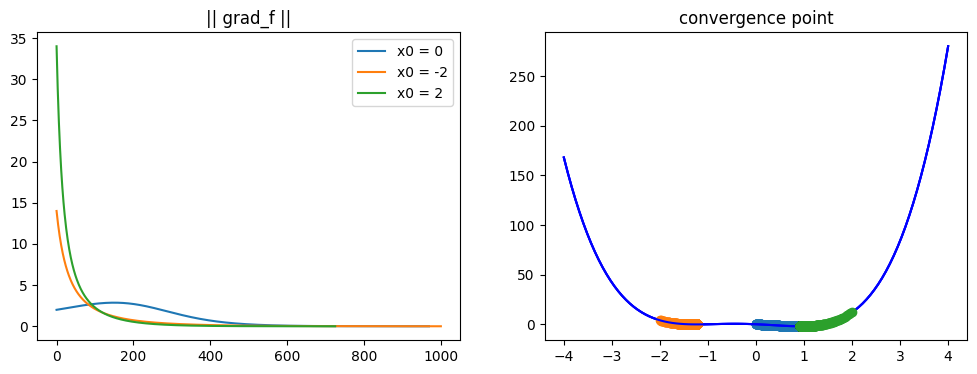

In [485]:
# set the tollerances 
tolf = 1e-6
tolx = 1e-6

# chose the max number of iterations
kmax = 1000

# chose the initial iteration 
x0 = np.zeros((2,))

# set step-size range
alphas = (1e-1, 1e-2, 1e-3)
x0s = (0, -2, 2)

for alpha in alphas:
    
    print(f"the selected step size is alpha = {alpha}")
    plt.figure(figsize=(12,4))
    
    for x0 in x0s:

        # test the algorithm
        x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha)

        # plot the results
        print(f"x0 = {x0}: GD on the function f converges after {k+1} iterations to the point {x_val[-1]}")

        plt.subplot(1, 2, 2)
        plt.plot(np.linspace(-4, 4, 100), f(np.linspace(-4, 4, 100)), 'blue')
        plt.plot(x_val, f(np.array(x_val)), 'o')
        plt.title('convergence point')
        
        plt.subplot(1, 2, 1)
        plt.plot(norm_grads)
        plt.title("|| grad_f ||")

    plt.legend([f"x0 = {x0}" for x0 in x0s])
    plt.show()

In [448]:
''' optimization via stochastic gradient descent '''
''' classification of MNIST digits with logistic regression '''

' classification of MNIST digits with logistic regression '

In [449]:
def SGD(f,grad_f,loss,grad_loss,w0,D,batch_size = 10,n_epoch = 50,lr = 1e-3):
    
    # load the dataset
    X,y = D
    
    # initial iteration
    w = w0
    results = [w]
    
    # dimension
    N, d = X.shape
    
    # number of batch per epoch
    n = N // batch_size 
    
    # initialize some arrays 
    grad_loss_w = grad_loss(f, grad_f, w, D)
    loss_val = [loss(f, w, D)]
    grad_loss_val = [grad_loss_w]
    norm_grad_loss_val = [np.linalg.norm(grad_loss_w, 2)]
    
    for epoch in range(n_epoch):
        
        # set the index 
        idx = np.arange(N)
        np.random.shuffle(idx)
        
        for k in range(n):
            
            # select the batch
            X_temp = X[idx[k*batch_size:(k+1)*batch_size], :]
            y_temp = y[idx[k*batch_size:(k+1)*batch_size], :]
            B = (X_temp,y_temp)
            
            # gradient descent iteration
            w = w - lr * grad_loss(f,grad_f,w,B)
            
        # update the arrays 
        results.append(w)
        loss_val.append(loss(f,w,D))
        grad_loss_w = grad_loss(f, grad_f, w, D)
        grad_loss_val.append(grad_loss_w)
        norm_grad_loss_val.append(np.linalg.norm(grad_loss_w, 2))
    
    return results, loss_val, grad_loss_val, norm_grad_loss_val

In [486]:
# load the dataset
df = pd.read_csv('train.csv')

df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [487]:
df = np.array(df)

# select the matrix X
X = df[:,1:] # the columns of X are flatted images

# select the vector I
Y = df[:,0:1] # at each index correspond the written digit at the same index (column) in X

print(f"the shape of X is: {X.shape}")
print(f"the shape of Y is: {Y.shape}")

the shape of X is: (42000, 784)
the shape of Y is: (42000, 1)


In [488]:
# compute the shape of X and the shape of each datapoints (image)
m,n = X.shape
nn = int(n**0.5) # shape of the images 

In [489]:
def select2digits(digit1, digit2, X, Y):
    m,n = X.shape
    idx = []
    count_digit1 = 0
    count_digit2 = 0
    for k in range(m):
        if Y[k, :] == digit1: 
            count_digit1 += 1
            idx.append(k)
        if Y[k, :] == digit2: 
            count_digit2 += 1
            idx.append(k)
    print(f"there are {count_digit1} samples for {digit1}")
    print(f"there are {count_digit2} samples for {digit2}")
    return X[idx, :], Y[idx, :]

def split_data(X, Y, train_size = 0.75):
    m,n = X.shape
    
    # create and shuffle the index 
    idx = np.array(range(m))
    np.random.shuffle(idx)
    
    # number of train samples
    Ntrain = int(round(m*train_size, 0))
    
    # split the idx
    idx_train = idx[:Ntrain]
    idx_test = idx[Ntrain:]
    
    # split the datasets
    Xtrain = X[idx_train,:]
    Xtest = X[idx_test,:]
    Ytrain = Y[idx_train,:]
    Ytest = Y[idx_test,:]
    
    print(f"there are {Ntrain} samples for train")
    print(f"there are {m - Ntrain} samples for test")
    
    return Xtrain, Xtest, Ytrain, Ytest

In [490]:
# select targets 
digit1 = 1
digit2 = 4
print(f"the first target digit is {digit1}")
print(f"the second target digit is {digit2}")

X, Y = select2digits(digit1, digit2, X, Y)
Xtrain, Xtest, Ytrain, Ytest = split_data(X, Y, train_size = 0.75)

the first target digit is 1
the second target digit is 4
there are 4684 samples for 1
there are 4072 samples for 4
there are 6567 samples for train
there are 2189 samples for test


In [491]:
# manipulate the data in order to perform a logistic regression

# add a new column to the datasets 
Xtrain_new = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis = 1)
Xtest_new = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis = 1)

# setup the labels (0 == digit1, 1 == digit2)
Ytrain_new = np.zeros(Ytrain.shape)
Ytest_new = np.zeros(Ytest.shape)
Ytrain_new[Ytrain == digit2] = 1
Ytest_new[Ytest == digit2] = 1

print(Xtrain_new.shape)
print(Xtest_new.shape)
print(Ytrain_new.shape)
print(Ytest_new.shape)

(6567, 785)
(2189, 785)
(6567, 1)
(2189, 1)


In [492]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def f(w,D):
    X,y = D
    return sigmoid(X @ w)

def grad_f(w,D):
    X,y = D
    return X.T @ sigmoid_prime(X @ w)

def loss(f,w,D):
    X,y = D
    y_pred = f(w,D)
    return 0.5 * np.mean(np.square(y_pred - y))

def grad_loss(f,grad_f,w,D):
    X,y = D
    return np.mean(X.T @ (sigmoid_prime(X @ w) * (f(w,D) - y)), axis=1)

def predict(f,w,D,treshold = 0.5):
    X,y = D
    N, d = X.shape
    pred = np.zeros((N,))
    fpred = f(w, D)
    for k in range(N):
        if fpred[k] > treshold:
            pred[k] = 1
    return pred

C:\Users\39392\AppData\Local\Temp\ipykernel_34220\457882416.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / ( 1 + np.exp(-x))


the accuracy on the train set is 49.63266851304573%
the accuracy on the test set is 49.619374750741954%


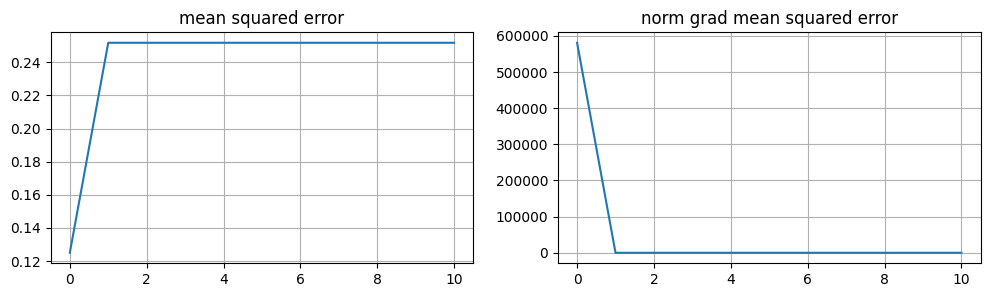

In [493]:
# compute the shape
N, d = Xtrain_new.shape

# set the parameters 
w0 = np.zeros((d,))
D_train = (Xtrain_new, Ytrain_new) # train set
D_test = (Xtest_new, Ytest_new) # test set
batch_size = 11
n_epoch = 10
lr = 1e-1

# compute the better parameter w* by SGD
results, loss_val, grad_loss_val, norm_grad_loss_val = SGD(f,grad_f,loss,grad_loss,w0,D_train,batch_size = batch_size,n_epoch = n_epoch,lr = lr)
w = results[-1]

# compute the accuracy of the classification 
print(f"the accuracy on the train set is {np.mean(predict(f, w, D_train) == Ytrain_new) * 100}%")
print(f"the accuracy on the test set is {np.mean(predict(f, w, D_test) == Ytest_new) * 100}%")

# plot the results of the SGD method 
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
plt.plot(loss_val)
plt.title('mean squared error')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(norm_grad_loss_val)
plt.title('norm grad mean squared error')
plt.grid()
plt.show()